In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Netflix TV Shows and Movies.csv")

In [3]:
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [5]:
df.shape

(5283, 11)

In [6]:
df.rename(columns={"title": "title_film", "index": "index_film","id":"id_film"},inplace=True)

In [7]:
df.dropna(subset=['description'], inplace=True)

In [8]:
df.shape

(5278, 11)

In [9]:
from sklearn.model_selection import train_test_split
data, x_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [10]:
#x_test_des=x_test[['description']]

In [11]:
data_des = data[['description']]

In [12]:
data_des.head()

,description
4557,"Set in Victorian London, the series follows a ..."
1159,Loving parodies of some of the world's best-kn...
2518,Julia travels to the Indo-Burma border to perf...
2963,Two former high school friends Patty and Cocoy...
1502,Enjoy this crackling fireplace during a holida...


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4222 entries, 4557 to 860
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index_film         4222 non-null   int64  
 1   id_film            4222 non-null   object 
 2   title_film         4222 non-null   object 
 3   type               4222 non-null   object 
 4   description        4222 non-null   object 
 5   release_year       4222 non-null   int64  
 6   age_certification  2418 non-null   object 
 7   runtime            4222 non-null   int64  
 8   imdb_id            4222 non-null   object 
 9   imdb_score         4222 non-null   float64
 10  imdb_votes         4208 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 395.8+ KB


In [14]:
data.head()

,index_film,id_film,title_film,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
4557,4557,ts220553,The Irregulars,SHOW,"Set in Victorian London, the series follows a ...",2021,TV-14,53,tt10893694,5.9,14714.0
1159,1159,ts36952,Documentary Now!,SHOW,Loving parodies of some of the world's best-kn...,2015,TV-14,22,tt4677934,8.1,6445.0
2518,2518,tm244196,Rangoon,MOVIE,Julia travels to the Indo-Burma border to perf...,2017,NaN,167,tt4909752,5.7,4690.0
2963,2963,tm368697,Unexpectedly Yours,MOVIE,Two former high school friends Patty and Cocoy...,2017,NaN,120,tt7686876,6.8,178.0
1502,1502,tm421855,4K Fireplace,MOVIE,Enjoy this crackling fireplace during a holida...,2015,G,181,tt5275236,7.7,48.0


In [15]:
data.shape

(4222, 11)

## cleansing

In [16]:
import re
def cleansing(df):
    df_clean=df.str.lower()
    df_clean=[re.sub(r"\d+","",i )for i in df_clean]
    df_clean=[re.sub(r'[^\w]', ' ', i)for i in df_clean]
    df_clean=[re.sub(r'\s+',' ',i)for i in df_clean]
    return df_clean

In [17]:
clean_text =cleansing(data_des['description'])

In [18]:
#clean_text_test=cleansing(x_test_des['description'])

In [19]:
data_des['description'].iloc[1]

"Loving parodies of some of the world's best-known documentaries. Each episode is shot in a different style of documentary filmmaking, and honors some of the most important stories that didn't actually happen."

In [20]:
clean_text[1]

'loving parodies of some of the world s best known documentaries each episode is shot in a different style of documentary filmmaking and honors some of the most important stories that didn t actually happen '

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
data_tfidf = vectorizer.fit_transform(clean_text)

In [22]:
tfidf_data_des = pd.DataFrame(data_tfidf.toarray(),columns=vectorizer.get_feature_names_out())
tfidf_data_des.head()

,aardman,aaron,aback,abad,abah,abaire,abandoned,abandoning,abandons,abang,...,œvideo,œwalt,œwhere,œwhy,œwill,œworst,œxiaosanâ,œyesterdayâ,œç,žå
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
tfidf_data_des.shape

(4222, 18452)

In [24]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

col = tfidf_data_des.columns

nltk.download('stopwords')

list_stopwords = set(stopwords.words('english'))

nonstop_tokens = [word for word in col if not word in list_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
tfidf_data_des = tfidf_data_des[nonstop_tokens]

In [26]:
tfidf_data_des.head()

,aardman,aaron,aback,abad,abah,abaire,abandoned,abandoning,abandons,abang,...,œvideo,œwalt,œwhere,œwhy,œwill,œworst,œxiaosanâ,œyesterdayâ,œç,žå
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
tfidf_data_des.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Columns: 18314 entries, aardman to žå
dtypes: float64(18314)
memory usage: 589.9 MB


In [28]:
#combine tfidf_train_des and x_train

tfidf_data_des = tfidf_data_des.reset_index()
data = data.reset_index()

In [29]:
df_list = pd.concat([data,tfidf_data_des], axis=1)
df_list.head()

,index,index_film,id_film,title_film,type,description,release_year,age_certification,runtime,imdb_id,...,œvideo,œwalt,œwhere,œwhy,œwill,œworst,œxiaosanâ,œyesterdayâ,œç,žå
0,4557,4557,ts220553,The Irregulars,SHOW,"Set in Victorian London, the series follows a ...",2021,TV-14,53,tt10893694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1159,1159,ts36952,Documentary Now!,SHOW,Loving parodies of some of the world's best-kn...,2015,TV-14,22,tt4677934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2518,2518,tm244196,Rangoon,MOVIE,Julia travels to the Indo-Burma border to perf...,2017,NaN,167,tt4909752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2963,2963,tm368697,Unexpectedly Yours,MOVIE,Two former high school friends Patty and Cocoy...,2017,NaN,120,tt7686876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1502,1502,tm421855,4K Fireplace,MOVIE,Enjoy this crackling fireplace during a holida...,2015,G,181,tt5275236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_list.isnull().sum()

index          0
index_film     0
id_film        0
title_film     0
type           0
              ..
œworst         0
œxiaosanâ      0
œyesterdayâ    0
œç             0
žå             0
Length: 18327, dtype: int64

## handle missing value

In [31]:
#handle age_certification

df_list['age_certification'].fillna('other',inplace=True)

In [32]:
df_list.head()

,index,index_film,id_film,title_film,type,description,release_year,age_certification,runtime,imdb_id,...,œvideo,œwalt,œwhere,œwhy,œwill,œworst,œxiaosanâ,œyesterdayâ,œç,žå
0,4557,4557,ts220553,The Irregulars,SHOW,"Set in Victorian London, the series follows a ...",2021,TV-14,53,tt10893694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1159,1159,ts36952,Documentary Now!,SHOW,Loving parodies of some of the world's best-kn...,2015,TV-14,22,tt4677934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2518,2518,tm244196,Rangoon,MOVIE,Julia travels to the Indo-Burma border to perf...,2017,other,167,tt4909752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2963,2963,tm368697,Unexpectedly Yours,MOVIE,Two former high school friends Patty and Cocoy...,2017,other,120,tt7686876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1502,1502,tm421855,4K Fireplace,MOVIE,Enjoy this crackling fireplace during a holida...,2015,G,181,tt5275236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_list['age_certification'].isnull().sum()

0

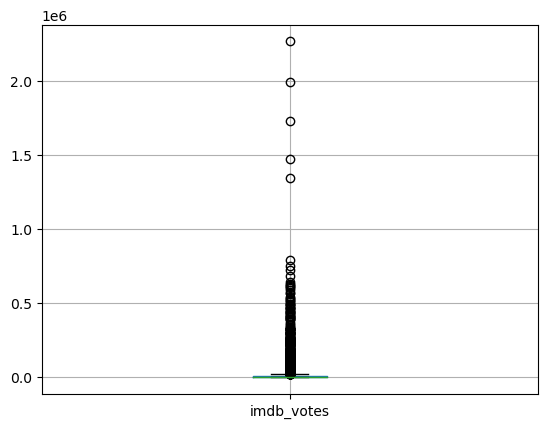

In [34]:
# handle imdb_votes

boxplot = data.boxplot(column=['imdb_votes']) 
plt.show()

In [35]:
df_list['imdb_votes'].median()

2283.5

In [36]:
df_list['imdb_votes'].fillna(2283.5,inplace=True)

In [37]:
df_list['imdb_votes'].isnull().sum()

0

## encoding

In [38]:
df_list['release_year'].unique().shape

(62,)

In [39]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_list['release_year'] = le.fit_transform(df_list['release_year'])
df_list.head()

,index,index_film,id_film,title_film,type,description,release_year,age_certification,runtime,imdb_id,...,œvideo,œwalt,œwhere,œwhy,œwill,œworst,œxiaosanâ,œyesterdayâ,œç,žå
0,4557,4557,ts220553,The Irregulars,SHOW,"Set in Victorian London, the series follows a ...",60,TV-14,53,tt10893694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1159,1159,ts36952,Documentary Now!,SHOW,Loving parodies of some of the world's best-kn...,54,TV-14,22,tt4677934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2518,2518,tm244196,Rangoon,MOVIE,Julia travels to the Indo-Burma border to perf...,56,other,167,tt4909752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2963,2963,tm368697,Unexpectedly Yours,MOVIE,Two former high school friends Patty and Cocoy...,56,other,120,tt7686876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1502,1502,tm421855,4K Fireplace,MOVIE,Enjoy this crackling fireplace during a holida...,54,G,181,tt5275236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# binary encoder
df_encode = {'type': {'MOVIE':0, 'SHOW':1}}
df_list = df_list.replace(df_encode)
df_list.head()

,index,index_film,id_film,title_film,type,description,release_year,age_certification,runtime,imdb_id,...,œvideo,œwalt,œwhere,œwhy,œwill,œworst,œxiaosanâ,œyesterdayâ,œç,žå
0,4557,4557,ts220553,The Irregulars,1,"Set in Victorian London, the series follows a ...",60,TV-14,53,tt10893694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1159,1159,ts36952,Documentary Now!,1,Loving parodies of some of the world's best-kn...,54,TV-14,22,tt4677934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2518,2518,tm244196,Rangoon,0,Julia travels to the Indo-Burma border to perf...,56,other,167,tt4909752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2963,2963,tm368697,Unexpectedly Yours,0,Two former high school friends Patty and Cocoy...,56,other,120,tt7686876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1502,1502,tm421855,4K Fireplace,0,Enjoy this crackling fireplace during a holida...,54,G,181,tt5275236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df_list['age_certification'].unique().shape

(12,)

In [42]:
# one hot encoder
from sklearn.preprocessing import OneHotEncoder
data_OHencoded = OneHotEncoder()
encode_data = pd.DataFrame(data_OHencoded.fit_transform(df_list[['age_certification']]).toarray(),columns = data_OHencoded.get_feature_names_out())
df_list = pd.concat([df_list,encode_data], axis=1)

In [43]:
df_list.head()

,index,index_film,id_film,title_film,type,description,release_year,age_certification,runtime,imdb_id,...,age_certification_PG,age_certification_PG-13,age_certification_R,age_certification_TV-14,age_certification_TV-G,age_certification_TV-MA,age_certification_TV-PG,age_certification_TV-Y,age_certification_TV-Y7,age_certification_other
0,4557,4557,ts220553,The Irregulars,1,"Set in Victorian London, the series follows a ...",60,TV-14,53,tt10893694,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1159,1159,ts36952,Documentary Now!,1,Loving parodies of some of the world's best-kn...,54,TV-14,22,tt4677934,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2518,2518,tm244196,Rangoon,0,Julia travels to the Indo-Burma border to perf...,56,other,167,tt4909752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2963,2963,tm368697,Unexpectedly Yours,0,Two former high school friends Patty and Cocoy...,56,other,120,tt7686876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1502,1502,tm421855,4K Fireplace,0,Enjoy this crackling fireplace during a holida...,54,G,181,tt5275236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_list.columns

Index(['index', 'index_film', 'id_film', 'title_film', 'type', 'description',
       'release_year', 'age_certification', 'runtime', 'imdb_id',
       ...
       'age_certification_PG', 'age_certification_PG-13',
       'age_certification_R', 'age_certification_TV-14',
       'age_certification_TV-G', 'age_certification_TV-MA',
       'age_certification_TV-PG', 'age_certification_TV-Y',
       'age_certification_TV-Y7', 'age_certification_other'],
      dtype='object', length=18339)

In [45]:
df_list[['title','index','id']]

,title,index,index,id
0,0.0,4557,0,0.0
1,0.0,1159,1,0.0
2,0.0,2518,2,0.0
3,0.0,2963,3,0.0
4,0.0,1502,4,0.0
...,...,...,...,...
4217,0.0,3095,4217,0.0
4218,0.0,3775,4218,0.0
4219,0.0,5196,4219,0.0
4220,0.0,5231,4220,0.0


## drop column

In [46]:
df_list_drop = df_list.drop([ 'index_film', 'id_film', 'title_film','index','description', 'imdb_id','age_certification'], axis=1)
df_list_drop.head()

,type,release_year,runtime,imdb_score,imdb_votes,aardman,aaron,aback,abad,abah,...,age_certification_PG,age_certification_PG-13,age_certification_R,age_certification_TV-14,age_certification_TV-G,age_certification_TV-MA,age_certification_TV-PG,age_certification_TV-Y,age_certification_TV-Y7,age_certification_other
0,1,60,53,5.9,14714.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,54,22,8.1,6445.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,56,167,5.7,4690.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,56,120,6.8,178.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,54,181,7.7,48.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = pd.DataFrame(cosine_similarity(df_list_drop))

In [48]:
cos_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,4212,4213,4214,4215,4216,4217,4218,4219,4220,4221
0,1.000000,0.999990,0.999457,0.804907,0.250582,0.999537,0.992802,0.999990,0.993709,0.990208,...,0.560531,0.999994,0.997992,0.999991,0.999748,0.999995,0.999413,0.998333,0.490418,0.999986
1,0.999990,1.000000,0.999476,0.805895,0.251625,0.999588,0.992995,0.999964,0.993930,0.990505,...,0.562844,0.999972,0.998256,0.999967,0.999777,0.999974,0.999509,0.998445,0.492289,0.999960
2,0.999457,0.999476,1.000000,0.823651,0.282296,0.999960,0.996132,0.999333,0.996705,0.994026,...,0.584221,0.999375,0.998159,0.999346,0.999929,0.999394,0.999815,0.999603,0.517428,0.999299
3,0.804907,0.805895,0.823651,1.000000,0.770113,0.822532,0.870178,0.802557,0.865994,0.879135,...,0.920361,0.803280,0.822622,0.802768,0.818028,0.803596,0.823276,0.837589,0.907881,0.802012
4,0.250582,0.251625,0.282296,0.770113,1.000000,0.279196,0.363453,0.247109,0.354314,0.378117,...,0.863521,0.248231,0.273711,0.247438,0.271988,0.248758,0.279064,0.304185,0.936302,0.246212


In [49]:
df_list.set_index('title_film', inplace=True)

In [50]:
df_list.head()

,index,index_film,id_film,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,...,age_certification_PG,age_certification_PG-13,age_certification_R,age_certification_TV-14,age_certification_TV-G,age_certification_TV-MA,age_certification_TV-PG,age_certification_TV-Y,age_certification_TV-Y7,age_certification_other
title_film,,,,,,,,,,,,,,,,,,,,,
The Irregulars,4557,4557,ts220553,1,"Set in Victorian London, the series follows a ...",60,TV-14,53,tt10893694,5.9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Documentary Now!,1159,1159,ts36952,1,Loving parodies of some of the world's best-kn...,54,TV-14,22,tt4677934,8.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Rangoon,2518,2518,tm244196,0,Julia travels to the Indo-Burma border to perf...,56,other,167,tt4909752,5.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Unexpectedly Yours,2963,2963,tm368697,0,Two former high school friends Patty and Cocoy...,56,other,120,tt7686876,6.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4K Fireplace,1502,1502,tm421855,0,Enjoy this crackling fireplace during a holida...,54,G,181,tt5275236,7.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df_list.shape

(4222, 18338)

In [52]:
indices = pd.Series(df_list.index)

In [53]:
indices[:10]

0           The Irregulars
1         Documentary Now!
2                  Rangoon
3       Unexpectedly Yours
4             4K Fireplace
5    Anelka: Misunderstood
6              Asakusa Kid
7                Let Me In
8                   E-Team
9    Hating Peter Tatchell
Name: title_film, dtype: object

In [54]:
def recommendations(title, cos_sim) :
    recommend_movie = []
    
    #ambil Judul Film berdasarkan variabel indices
    idx = indices[indices==title].index[0]
    
    #buat series dari nilai cosine similarity
    score_series = pd.Series(cos_sim[idx]).sort_values(ascending=False)
    
    #ambil index dan buat 10 baris rekomendasi terbaik
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    for i in top_10_indexes:
        recommend_movie.append(list(df_list.index)[i])
        
    return recommend_movie

In [55]:
recommendations('Let Me In',cos_sim)

['The Ballad of Buster Scruggs',
 'A Walk Among the Tombstones',
 'Savages',
 'Halloween',
 'Phantom Thread',
 'The Other Boleyn Girl',
 'I Care a Lot',
 'Tears of the Sun',
 'Triple Frontier',
 'Hairspray']

## PICKLE


In [56]:
import pickle

# Save DataFrame
with open('df.pkl', 'wb') as file:
    pickle.dump(df, file)

# Save cosine similarity 
with open('cos_sim.pkl', 'wb') as file:
    pickle.dump(cos_sim, file)

# Save indices
with open('indices.pkl', 'wb') as file:
    pickle.dump(indices, file)

# Save df_list
with open('df_list.pkl', 'wb') as file:
    pickle.dump(df_list, file)